In [1]:
import numpy as np
import os
import multiprocessing as mul
import matplotlib.pyplot as plt
from numba import jit, njit, prange, set_num_threads, vectorize
from tqdm import tqdm
import pickle
import scipy.stats as st
import scipy.interpolate as interp
import argparse as ap

from core.stacking_analysis import *

In [2]:
all_TS_same_psr = pickle.load(open('./pickle/all_TSS_wt_d2_wt_s_1000_bins_C_wt_valid_dDM_s14.pkl', 'rb'))

all_TS_mixed_pkl = pickle.load(open('./pickle/all_TSS_mixed.pkl', 'rb'))
phio = np.logspace(-38, -26, 1000)

phio_paper = 1.44e-27 * 6 * np.pi
ic_e_paper = np.logspace(np.log10(15e12), np.log10(5e15))
e2dfde_ic = 1e28 * dfde(ic_e_paper, -2.37, phio_paper)

In [3]:
gamma_arr = np.asarray([-2.2, -2, -2.53, -3])

e_decade = [1e12, 1e13, 1e14, 1e15, 1e16]
all_e_UL = []
for e_UL in e_decade:
    e2dfde = []

    for gamma in prange(len(gamma_arr)):
        temp = []
        for phi in range(len(phio)):
            temp.append( e_UL**2 * dfde(e_UL, gamma_arr[gamma], phio[phi]))        #in eV
        e2dfde.append(temp)
    e2dfde = np.asarray(e2dfde)

    all_e_UL.append(e2dfde)

In [4]:
np.shape(all_e_UL)

(5, 4, 1000)

In [5]:
enus = np.ones(1000)
cone_deg=5

In [6]:
all_TS_mixed_pkl.shape

(3, 4, 1000)

In [7]:
all_TS_same_psr.shape

(3, 4, 1000)

In [8]:
all_UL_mixed = []
for ws in range(3):
    temp2 = []
    for gamma in prange(len(gamma_arr)):
        temp = []
        for i in all_e_UL:
            dist_g = interp.interp1d(all_TS_mixed_pkl[ws][gamma], i[gamma]/1e9)
            temp.append(dist_g(-3.84))

        # print(max(temp), gamma_arr[gamma])    
        temp2.append(temp)
    all_UL_mixed.append(temp2)
    
all_UL_mixed = np.asarray(all_UL_mixed)

all_UL_same = []
for ws in range(3):
    temp2 = []
    for gamma in prange(len(gamma_arr)):
        temp = []
        for i in all_e_UL:
            dist_g = interp.interp1d(all_TS_same_psr[ws][gamma], i[gamma]/1e9)
            temp.append(dist_g(-3.84))

        # print(max(temp), gamma_arr[gamma])    
        temp2.append(temp)
    all_UL_same.append(temp2)

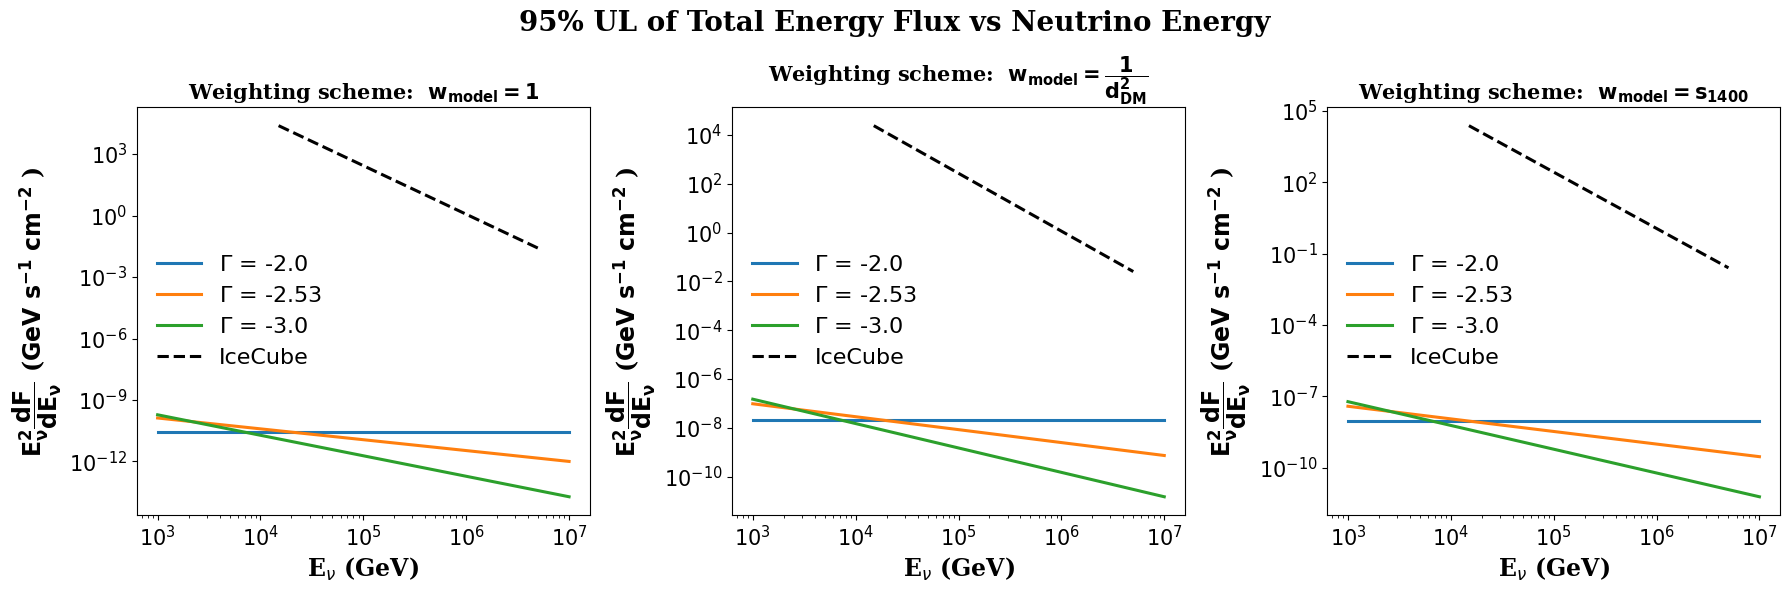

done


In [9]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 17,
        }

fig, axs = plt.subplots(1,3, figsize=(18, 6))


for i in range(3):
    for gamma in range(1, len(gamma_arr)):

        axs[i].plot(np.divide(e_decade, 1e9), np.multiply(all_UL_mixed[i][gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-')# + ' with wt')    #in GeV
        
        # axs[i].scatter(np.divide(e_decade, 1e9), np.multiply(all_UL_wd_ws[i-1][gamma], 3))
    axs[i].plot(ic_e_paper/1e9, e2dfde_ic, label='IceCube', lw=2.2, ls='--', color='black')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
    axs[i].set_ylabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ )', fontdict=axesfont)
    axs[i].xaxis.set_tick_params(labelsize=15)
    axs[i].yaxis.set_tick_params(labelsize=15)
    
    axs[i].legend(prop={'size':16}, framealpha=0)


axs[0].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
axs[1].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
axs[2].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)

# if cone_deg == 5:
plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
    
plt.tight_layout()
plt.savefig(f'outputs/UL_all_w_model_bins={len(enus)}_C_wmodel_all_{cone_deg}_mixed.pdf')
plt.show()
print('done')

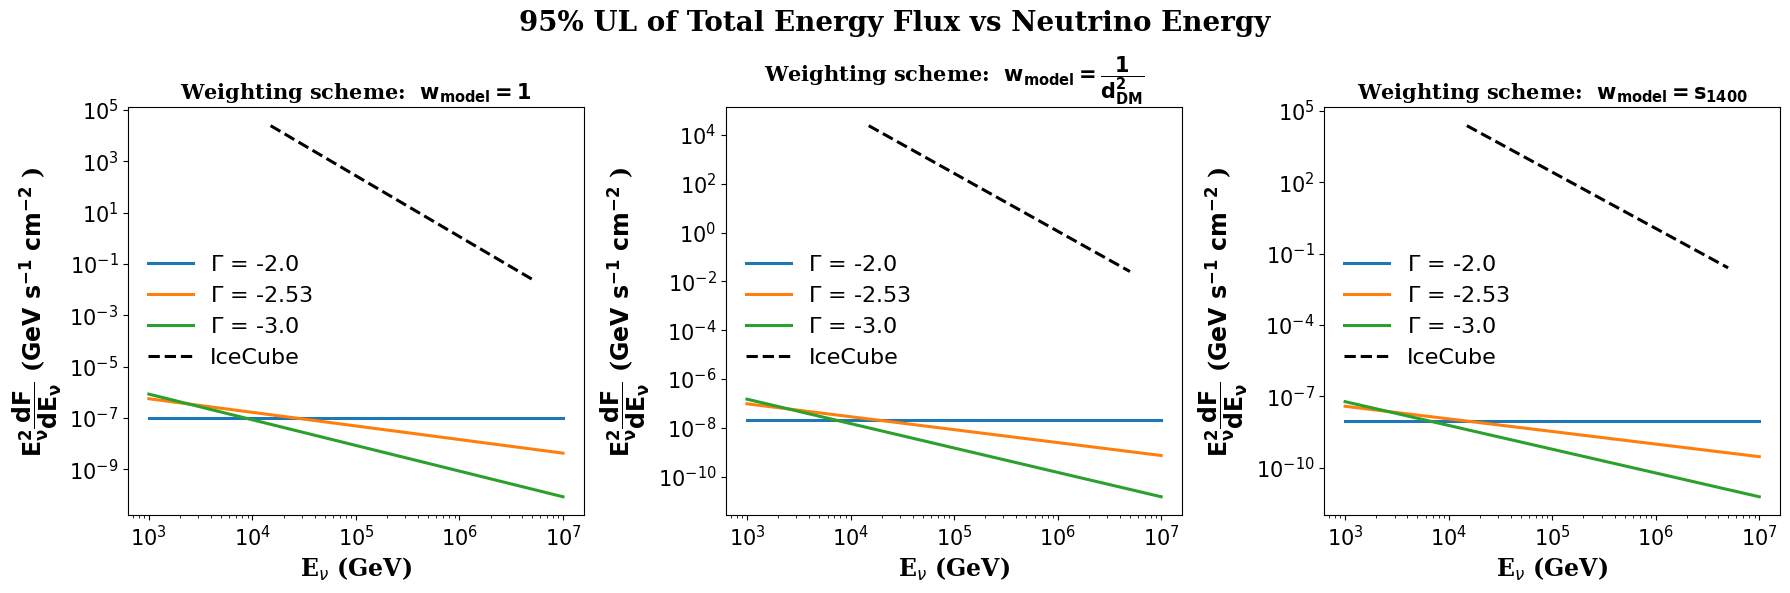

done


In [11]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 17,
        }

fig, axs = plt.subplots(1,3, figsize=(18, 6))


for i in range(3):
    for gamma in range(1, len(gamma_arr)):

        axs[i].plot(np.divide(e_decade, 1e9), np.multiply(all_UL_same[i][gamma], 3), label='$\Gamma$ = ' + str(gamma_arr[gamma]), lw=2.2, ls='-')# + ' with wt')    #in GeV
        # axs[i].scatter(np.divide(e_decade, 1e9), np.multiply(all_UL_wd_ws[i-1][gamma], 3))
    axs[i].plot(ic_e_paper/1e9, e2dfde_ic, label='IceCube', lw=2.2, ls='--', color='black')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlabel('E$_{\u03BD}$ (GeV)', fontdict=axesfont)
    axs[i].set_ylabel('$\mathsf{\mathbf{E^2_{\u03BD} \dfrac{dF}{dE_{\u03BD}}}}$ ($\mathsf{\mathbf{GeV}}$ $\mathsf{\mathbf{s^{-1}}}$ $\mathsf{\mathbf{cm^{-2}}}$ )', fontdict=axesfont)
    axs[i].xaxis.set_tick_params(labelsize=15)
    axs[i].yaxis.set_tick_params(labelsize=15)
    
    axs[i].legend(prop={'size':16}, framealpha=0)


axs[0].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = 1}}$', fontdict=smallerfont)
axs[1].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = \dfrac{1}{d_{DM}^2}}}$' , fontdict=smallerfont)
axs[2].set_title('Weighting scheme:  $\mathsf{\mathbf{w_{model} = s_{1400}}}$', fontdict=smallerfont)

# if cone_deg == 5:
plt.suptitle('95% UL of Total Energy Flux vs Neutrino Energy', fontweight='bold', fontsize=20, fontfamily='serif')
    
plt.tight_layout()
plt.savefig(f'outputs/UL_all_w_model_bins={len(enus)}_C_wmodel_all_{cone_deg}_same_psrs.pdf')
plt.show()
print('done')